In [43]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

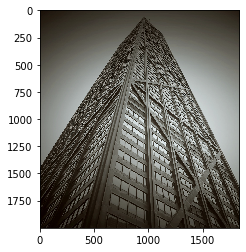

(2000, 1834, 3)

In [44]:
img = cv2.imread("1.jpg")
plt.imshow(img, cmap=plt.cm.bone)
plt.show()
img.shape

In [45]:
lowcimage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

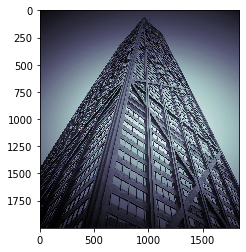

(2000, 1834)

In [46]:
plt.imshow(lowcimage, cmap=plt.cm.bone)
plt.show()
lowcimage.shape

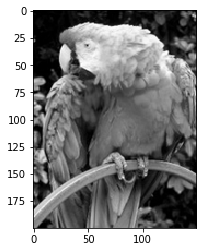

(200, 150, 3)

In [47]:
imghc = cv2.imread("img.png")
plt.imshow(imghc, cmap=plt.cm.bone)
plt.show()
imghc.shape

In [48]:
highcimage = cv2.cvtColor(imghc, cv2.COLOR_BGR2GRAY)

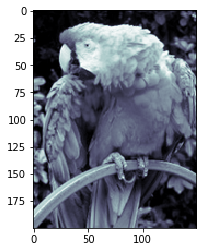

(200, 150)

In [49]:
plt.imshow(highcimage, cmap=plt.cm.bone)
plt.show()
highcimage.shape

In [50]:
def histogram_sp(inpimage, desiredimage, bins):
    
    ###############
    # Given Image #
    ###############
    temp = 0
    rows,cols = inpimage.shape
    oimg = np.zeros((rows,cols))
    ins = np.zeros(bins)
    cmd = np.zeros(bins)
    b = np.arange(256//bins,257,256//bins)

    for i in range(rows):
        for j in range(cols):
            ins[inpimage[i][j]//(256//bins)] += 1
    
    pd = ins/(rows*cols)

    plt.bar(b,pd,width = 10)
    plt.xticks(b)
    plt.xlabel("Intensity Bins")
    plt.ylabel("Normalized Frequency")
    plt.title("Normalized Graph")
    plt.show()

    for i in range(bins):
        temp += pd[i]
        cmd[i] = np.round(temp*255)
        
    print(cmd)
    
    ###############
    #Desired Image#
    ###############
    
    dtemp = 0
    drows,dcols = desiredimage.shape
    doimg = np.zeros((drows,dcols))
    dins = np.zeros(bins)
    dcmd = np.zeros(bins)
    db = np.arange(256//bins,257,256//bins)

    for i in range(drows):
        for j in range(dcols):
            dins[desiredimage[i][j]//(256//bins)] += 1
    
    dpd = dins/(drows*dcols)

    plt.bar(db,dpd,width = 10)
    plt.xticks(db)
    plt.xlabel("Intensity Bins")
    plt.ylabel("Normalized Frequency")
    plt.title("Normalized Graph")
    plt.show()

    for i in range(bins):
        dtemp += dpd[i]
        dcmd[i] = np.round(dtemp*255)    
    
    print(dcmd)
    print(len(dcmd))
    
    print(b)
    print(len(b))
    ###############
    #   Mapping   #
    ###############
    
    opcmd = np.zeros(bins)
    
    #for i in range(256):
    #    for j in range(256):
    #        if(dcmd[j]>=cmd[i]):
    #            opcmd[i] = db[j]
    
    for i in range(256):
        if(dcmd[i]<cmd[i]):
            j = i
            while(True):
                j+=1
                
                if(j>255):
                    break
                elif(dcmd[j]>= cmd[j]):
                    opcmd[i] = dcmd[j]
                    break
                
    print(opcmd) 
    
    ###############
    #  New Image  #
    ###############
    
    for i in range(drows):
        for j in range(dcols):
            doimg[i][j] = opcmd[desiredimage[i][j]//(256//bins)]

    plt.imshow(doimg, cmap=plt.cm.bone)
    plt.show()

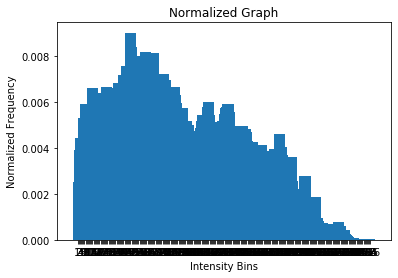

[  0.   1.   2.   3.   4.   5.   6.   8.   9.  10.  11.  12.  13.  15.
  16.  18.  19.  21.  22.  24.  25.  26.  28.  30.  31.  33.  34.  36.
  38.  39.  40.  42.  43.  44.  46.  47.  49.  51.  52.  54.  56.  57.
  59.  61.  62.  64.  67.  69.  70.  72.  74.  76.  78.  79.  81.  83.
  84.  86.  87.  89.  91.  92.  94.  96.  97.  99. 101. 103. 105. 106.
 108. 110. 111. 112. 114. 116. 117. 119. 120. 121. 122. 124. 125. 126.
 128. 130. 131. 132. 134. 135. 136. 138. 139. 140. 141. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 152. 153. 154. 156. 157. 158. 159. 160.
 162. 163. 165. 166. 167. 168. 169. 170. 171. 173. 174. 175. 176. 178.
 179. 180. 182. 183. 184. 186. 187. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 200. 201. 202. 203. 205. 206. 207. 208. 209. 210. 211.
 212. 213. 214. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224.
 225. 226. 227. 228. 229. 229. 230. 231. 232. 234. 234. 235. 236. 237.
 238. 238. 239. 240. 241. 241. 242. 242. 243. 243. 244. 244. 245. 245.
 246. 

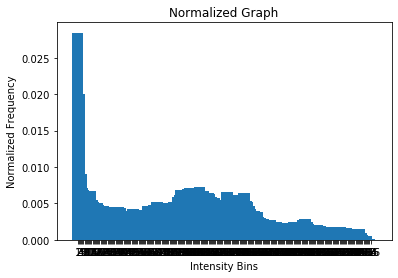

[  7.  12.  15.  17.  19.  20.  22.  23.  25.  26.  27.  29.  31.  32.
  33.  34.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.
  63.  64.  65.  66.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  88.  89.  90.
  91.  92.  93.  95.  96.  97.  98.  99. 101. 102. 103. 104. 105. 107.
 108. 109. 110. 112. 113. 115. 117. 118. 120. 121. 123. 125. 126. 128.
 130. 132. 133. 135. 137. 138. 140. 142. 144. 145. 147. 149. 150. 152.
 153. 154. 156. 158. 159. 160. 162. 163. 164. 166. 167. 168. 169. 171.
 172. 173. 175. 176. 178. 179. 181. 182. 184. 185. 187. 188. 189. 191.
 192. 194. 195. 196. 198. 200. 201. 202. 204. 205. 206. 207. 208. 209.
 210. 210. 211. 212. 213. 214. 214. 215. 216. 216. 217. 218. 218. 219.
 220. 220. 221. 221. 222. 222. 223. 223. 224. 224. 225. 225. 226. 227.
 227. 227. 228. 228. 229. 229. 230. 230. 231. 231. 232. 232. 233. 233.
 234. 

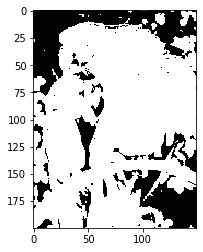

In [51]:
histogram_sp(lowcimage, highcimage, 256)